
## CS6220 - HW4 - Maha Alkhairy
### Clustering and evaluation 


### Written part: 
#### for more detail look at the scanned pdf 

#### Question 1: 
a. The clusters given their points: 
* Cluster 1: {[0, 1], [1, 2], [2, 3], [3, 4]} 
* Cluster 2: {[5, 2], [6, 1], [7, 2], [6, 3]}

b. Points which are density connected: 
* [0, 1], [1, 2], [2, 3] and [3, 4] are density connected
* [5, 2], [6, 1], [7, 2] and [6, 3] are density connected   
c. Points considered as noise are: [0, 6], [0, 7] and [10, 3]



In [ ]:
# ******  plotting the written part to make sense of data ****
data_DBSCAN = np.array([[0, 1], 
                        [5, 2], 
                        [2, 3], 
                        [6, 1], 
                        [10, 2],
                        [0, 6], 
                        [3, 4], 
                        [6, 3], 
                        [0, 7], 
                        [7, 2], 
                        [1, 2]])

# print(data_DBSCAN)


df_2 = DataFrame(data_DBSCAN, columns = ['x1', 'x2'])
df_2.plot(kind='scatter', x = 'x1', y = 'x2')
plt.show()

#### Question 2: 
C<sub>1</sub> = {(5, 6), (8, 7), (7, 3)} <br/>
C<sub>2</sub> = {(6, 5), (4, 5), (9, 2), (3, 5), (8, 4)}

a. mean vectors: 
 * m1 = [6.66666, 5.33333] (mean of first cluster (1 × 2))
 * m2 = [6, 4.2]            (mean of second cluster (1 × 2)) 
 
b. total mean vector: 
* m = [6.25, 4.625]       (mean of all points (1 × 2))  


c. Scatter matrices of the clusters 
* S<sub>1</sub> = [[4.6666, 0.333333], [0.33333, 8.66666]]   (scatter matrix of cluster 1 (2 × 2)) 
* S<sub>2</sub> = [[26, -11], [-11, 6.8]]   (scatter matrix of cluster 2 (2 × 2))  
 
d. Within cluster scatter matrix (2 × 2)
* S<sub>w</sub> = S<sub>1</sub> + S<sub>2</sub> = [[30.6666, -10.6666], [-10.6666, 15.46666]]


e. Between cluster scatter matrix (2 × 2)
* S<sub>b</sub> = (m1 - m).T × (m1 - m) = [[0.83333, 1.4166666], [1.4166666, 2.40833333]]

f. evaluation: based on the scattering criteria, this clustering is not good. 
* tr(S<sub>w</sub>)  = 30.6666 + 15.46666  = 46.1333 (want low)
* tr(S<sub>b</sub>)  = 0.83333 + 2.40833333 = 3.2416666 (want high)
* (tr(S<sub>b</sub>)  / tr(S<sub>w</sub>)) = 0.070267 (want high)



In [ ]:
# ******  plotting the written part to make sense of data ****
cluster1 = [[5, 6], [8, 7], [7, 3]]
cluster2 = [[6, 5], [4, 5], [9, 2], [3, 5], [8, 4]]

# all_data = list(cluster1)
# all_data.extend(cluster2)

# cluster1_matrix = np.array(cluster1)
# cluster2_matrix = np.array(cluster2)

# all_data_matrix = np.array(all_data)


df = DataFrame(np.array(cluster1), columns = ['x1', 'x2'])
c1 = df.plot(kind='scatter', x = 'x1', y = 'x2')
# plt.show()

df1 = DataFrame(np.array(cluster2), columns = ['x1', 'x2'])
df1.plot(kind='scatter', x = 'x1', y = 'x2', c = ['red'], ax = c1)
plt.show()
    
# m1 = np.mean(cluster1_matrix, axis=0)
# m2 = np.mean(cluster2_matrix, axis=0)
# m = np.mean(all_data_matrix, axis=0)

# C1_m1 = cluster1_matrix - m1
# C2_m2 = cluster2_matrix - m2

# S1 = np.dot(C1_m1.T, C1_m1)
# S2 = np.dot(C2_m2.T, C2_m2)
# S_W = S1 + S2 

# m_1 = np.array([(m1 - m)])
# m_2 = np.array([(m2 - m)])
# S_B = np.dot(m_1.T, m_1) * 3 + np.dot(m_2.T, m_2) * 5
# np.shape(S_B)
# print(S_B.trace()/ S_W.trace())

### Programming part: 

In [1]:
"""
Implementation of different types of clustering 
"""
import random
import sklearn 
import numpy as np 
import scipy.io 
import matplotlib.pyplot as plt
from scipy.spatial import distance
from pandas import DataFrame
from sklearn.metrics import normalized_mutual_info_score, silhouette_score, calinski_harabaz_score

In [2]:
data1 = np.loadtxt("datasets/datasets/dataset1.txt",
                    dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)},
                    delimiter="\t")
data2 = np.loadtxt("datasets/datasets/dataset2.txt",
                   dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)}, 
                   delimiter="\t")
data3 = np.loadtxt("datasets/datasets/dataset3.txt",
                   dtype = {'names': ('x1', 'x2', 'label'), 'formats': (float, float, int)}, 
                   delimiter="\t")

In [3]:
def create_io_matrix(d): 
    """
    formats the input data in a matrix format (n × d) where d is the number of dimentions and n is the number of data points 
    formats the label data in a matrix format (n × 1) where n is the number of data points 
    """
    matrix_input = [[x1, x2] for x1, x2, l in d]
    matrix_labels = [l for x1, x2, l in d]
    
    return (np.array(matrix_input), np.array(matrix_labels))

In [4]:
### number of clusters = 3
data1_matrix, data1_labels = create_io_matrix(data1)
# print(len(data1))
print(np.shape(data1_matrix))
# print(np.shape(data1_labels))
# print(data1_labels)
### number of cluster = 3
data2_matrix, data2_labels = create_io_matrix(data2)
# print(len(data2))
# print(np.shape(data2_matrix))
# print(np.shape(data2_labels))
# print(data2_labels)
### number of clusters = 2
data3_matrix, data3_labels = create_io_matrix(data3)
# print(len(data3))
# print(np.shape(data3_matrix))
# print(np.shape(data3_labels))

(150, 2)


=================== data 1 ======================


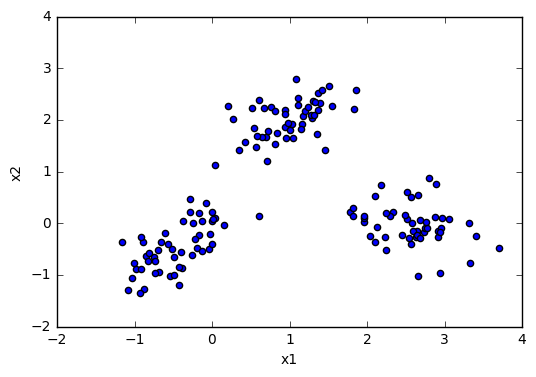

===================== data 2 ===================


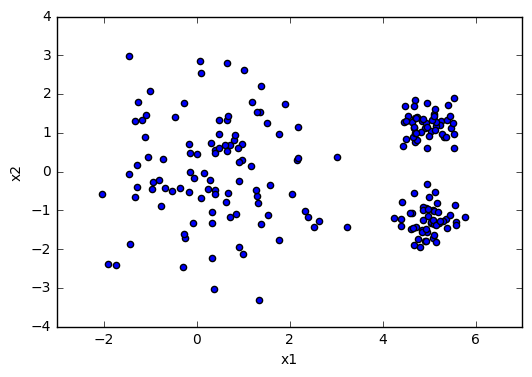

================= data 3 ==================


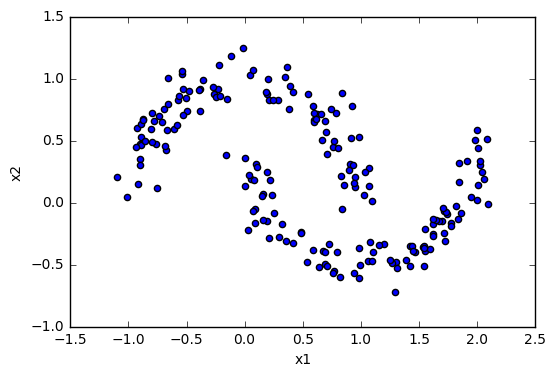

In [70]:
############# initial data visualization 

df_1 = DataFrame(data1_matrix, columns = ['x1', 'x2'])
df_1.plot(kind='scatter', x = 'x1', y = 'x2')

print("=================== data 1 ======================")
plt.show()

df_2 = DataFrame(data2_matrix, columns = ['x1', 'x2'])
df_2.plot(kind='scatter', x = 'x1', y = 'x2')

print("===================== data 2 ===================")
plt.show()

df_3 = DataFrame(data3_matrix, columns = ['x1', 'x2'])
df_3.plot(kind='scatter', x = 'x1', y = 'x2')

print("================= data 3 ==================")
plt.show()

based on the plotting of the points above, I would predict that k-means would be the best algorithm to get the clusters is k-means with 3 clusters 



In [16]:
"""
### used sudo code from wikipedia

DBSCAN(D, eps, MinPts) {
   C = 0
   for each point P in dataset D {
      if P is visited
         continue next point
      mark P as visited
      NeighborPts = regionQuery(P, eps)
      if sizeof(NeighborPts) < MinPts
         mark P as NOISE
      else {
         C = next cluster
         expandCluster(P, NeighborPts, C, eps, MinPts)
      }
   }
}

expandCluster(P, NeighborPts, C, eps, MinPts) {
   add P to cluster C
   for each point P' in NeighborPts { 
      if P' is not visited {
         mark P' as visited
         NeighborPts' = regionQuery(P', eps)
         if sizeof(NeighborPts') >= MinPts
            NeighborPts = NeighborPts joined with NeighborPts'
      }
      if P' is not yet member of any cluster
         add P' to cluster C
   }
}

regionQuery(P, eps)
   return all points within P's eps-neighborhood (including P)
"""

### DBSCAN Algorithm: 
def DBSCAN(eps, min_points, input_matrix): 
    """
    """
    visited = []
    noise = []
    clusters = []
    
    print("DBSCAN ....")
  
    for p in input_matrix:
        if not(list(p) in visited):
            visited.append(list(p))
            neighbors = region_query(p, eps, input_matrix) 
            if len(neighbors) < min_points: 
#                 print("found noise") 
                noise.append(p)
            else: 
                c = []
#                 print("found a new cluster") 
                cluster_expanded = expand_cluster(p, neighbors, c, eps, min_points, visited, clusters, input_matrix)
#                 print("left expand_cluster")
                clusters.append(cluster_expanded)
    return (clusters, noise)
            

def expand_cluster(p, neighbors, c, eps, min_points, visited, clusters, input_matrix): 
    """
    """
#     print("in expand cluster")
#     print(len(neighbors))
    c.append(list(p))
    for q in neighbors: 
        if list(q) not in visited: 
            visited.append(list(q))
            new_neighbors = region_query(q, eps, input_matrix)
            if len(new_neighbors) >= min_points: 
                neighbors.extend(new_neighbors)
        else: 
            if not member_cluster(q, clusters):
                c.append(q)
    return c
            
def member_cluster(q, clusters):
    for c in clusters: 
        if list(q) in c:
            return True
    return False

def region_query(p, eps, input_matrix): 
    """
    :return: all points within P's eps-neighborhood (including P)
    """
    eps_neighbors = [list(x) for x in input_matrix if (distance.euclidean(x, p) <= eps)]
    return eps_neighbors
    


In [18]:
clusters111, noise111 = DBSCAN(0.2, 2, data1_matrix)
clusters112, noise112 = DBSCAN(0.2, 3, data1_matrix)
clusters113, noise113 = DBSCAN(0.2, 4, data1_matrix)

clusters121, noise121 = DBSCAN(0.3, 2, data1_matrix)
clusters122, noise122 = DBSCAN(0.3, 3, data1_matrix)
clusters123, noise123 = DBSCAN(0.3, 4, data1_matrix)


clusters131, noise131 = DBSCAN(0.4, 2, data1_matrix)
clusters132, noise132 = DBSCAN(0.4, 3, data1_matrix)
clusters133, noise133 = DBSCAN(0.4, 4, data1_matrix)

DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....


In [38]:
clusters211, noise211 = DBSCAN(0.8, 6, data2_matrix)
clusters212, noise212 = DBSCAN(0.8, 7, data2_matrix)
clusters213, noise213 = DBSCAN(0.8, 8, data2_matrix)

clusters221, noise221 = DBSCAN(0.85, 6, data2_matrix)
clusters222, noise222 = DBSCAN(0.85, 7, data2_matrix)
clusters223, noise223 = DBSCAN(0.85, 8, data2_matrix)

clusters231, noise231 = DBSCAN(0.9, 6, data2_matrix)
clusters232, noise232 = DBSCAN(0.9, 7, data2_matrix)
clusters233, noise233 = DBSCAN(0.9, 8, data2_matrix)

DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....


In [39]:
clusters311, noise311 = DBSCAN(0.2, 5, data3_matrix)
clusters312, noise312 = DBSCAN(0.2, 6, data3_matrix)
clusters313, noise313 = DBSCAN(0.2, 7, data3_matrix)

clusters321, noise321 = DBSCAN(0.3, 5, data3_matrix)
clusters322, noise322 = DBSCAN(0.3, 6, data3_matrix)
clusters323, noise323 = DBSCAN(0.3, 7, data3_matrix)


clusters331, noise331 = DBSCAN(0.4, 5, data3_matrix)
clusters332, noise332 = DBSCAN(0.4, 6, data3_matrix)
clusters333, noise333 = DBSCAN(0.4, 7, data3_matrix)

DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....
DBSCAN ....


In [71]:
def plotResultsDBSCAN(clusters, noise, colors):
    """
    """
    K = len(clusters)
    print(K)
    df = DataFrame(np.array(clusters[0]), columns = ['x1', 'x2'])
    c_k =  df.plot(kind='scatter', x = 'x1', y = 'x2', color=colors[0])
    for k in range(K-1):
        df = DataFrame(np.array(clusters[k]), columns = ['x1', 'x2'])
        c_k =  df.plot(kind='scatter', x = 'x1', y = 'x2', color=colors[k], ax=c_k)
        
    if noise:
        df = DataFrame(np.array(noise), columns = ['x1', 'x2'])
        df.plot(kind='scatter', x = 'x1', y = 'x2', color="yellow", ax=c_k)

    plt.show()

3


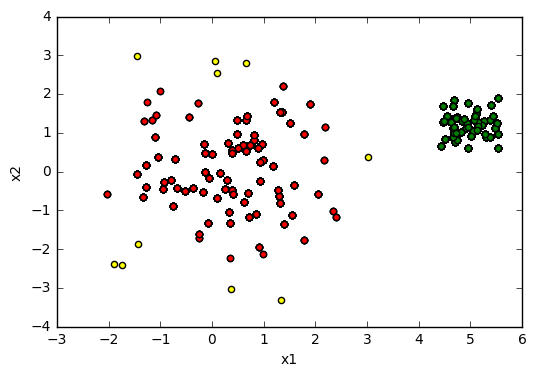

In [75]:

plotResultsDBSCAN(clusters233, noise233, ["red", "green", "blue"])


In [76]:
#### K-means algorithm 
## * should preform multiple random initializations and keep the best 
## ---- not crash when initialization results in empty clusters

def K_means_helper(K, input_matrix, initial_means = False): 
    """
    K: number of clusters 
    ...
    """
    N, d = np.shape(input_matrix)
    if not initial_means: 
        randomInts = [random.randint(1, N-1)  for i in range(K)]
        cluster_means = [input_matrix[i] for i in randomInts]
    else: 
        cluster_means = initial_means

    i = 0 
    ### should be till convergence 
    while i < 1000:
        cluster_assignments = get_cluster_assignments(K, cluster_means, input_matrix)
        previous_means = cluster_means
        cluster_means = get_cluster_means(K, cluster_assignments, input_matrix)
        return (cluster_assignments, cluster_means)
        i += 1
        
def get_cluster_assignments(K, cluster_means, input_matrix): 
    """
    """
    N, d = np.shape(input_matrix)
    print(N, d)
    cluster_assignments = np.zeros((N, K))
    ### the rows are one hot vectors which indicate whether the data point is in the cluster
    
    for i in range(N): 
        x_i = input_matrix[i]
        distances = list(map(lambda m: np.linalg.norm((x_i - m), ord=2), cluster_means))
        k = distances.index(min(distances))
        cluster_assignments[i, k] = 1
    return cluster_assignments
        
def get_cluster_means(K, cluster_assignments, input_matrix):
    """
    """
    N, d = np.shape(input_matrix)
    new_means = [0 for i in range(K)]
    
    for k in range(K):
        c = cluster_assignments[:, k]
        den = np.sum(cluster_assignments, axis = 0)[0]
#         print(den)
        num = 0
        for i in range(N): 
            if cluster_assignments[i, k] == 1: 
                num += input_matrix[i]
        if num is 0: 
            new_means[k] = np.zeros(1, d)
        else:
            new_means[k] = num/den
            
    return new_means

In [77]:
def getClusteredData(input_matrix, cluster_assignments, k):
#     print(K)
    wanted = cluster_assignments[:, k]
    
    wanted_X = []
   
    for i in range(len(wanted)):
        if cluster_assignments[i][k] == 1: 
            wanted_X.append(input_matrix[i])
            
    return wanted_X

In [78]:
# def check_results(cluster_assignments, input_matrix, ): 
    

In [79]:
def plotResults(input_matrix, cluster_assignments, centroids, K, colors):
    """
    """
    cluster_0  =  getClusteredData(input_matrix, cluster_assignments, 0)
    df = DataFrame(cluster_0, columns = ['x1', 'x2'])
    c_0 =  df.plot(kind='scatter', x = 'x1', y = 'x2', color=colors[0])
 
    c_k = None 
    for k in range(K-1):
        k = k + 1
        cluster_k  =  getClusteredData(input_matrix, cluster_assignments, k)
        df = DataFrame(cluster_k, columns = ['x1', 'x2'])
        c_k =  df.plot(kind='scatter', x = 'x1', y = 'x2', color=colors[k], ax=c_0)
        df = DataFrame(centroids, columns = ['x1', 'x2'])

        df.plot(kind='scatter', x = 'x1', y = 'x2', color='black', s = 25, marker = 'x',  ax = c_k)
    plt.show()



150 2
[array([-0.1032948 ,  0.28016771]), array([ 2.19739358,  0.74476628])]


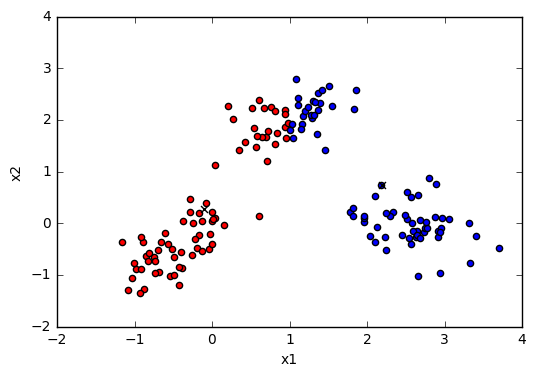

200 2
[array([ 2.62225329, -1.1471844 ]), array([ 2.65074675,  1.12990498])]


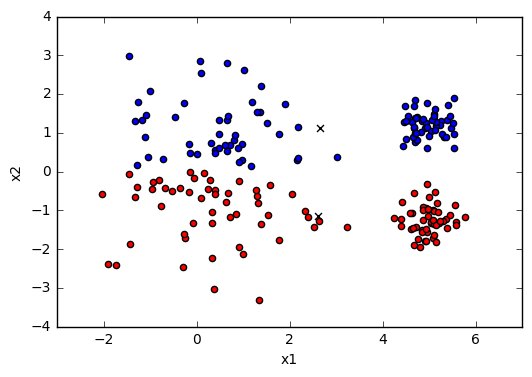

200 2
[array([-0.4325559 ,  0.39602143]), array([ 2.2042257 ,  0.36799764])]


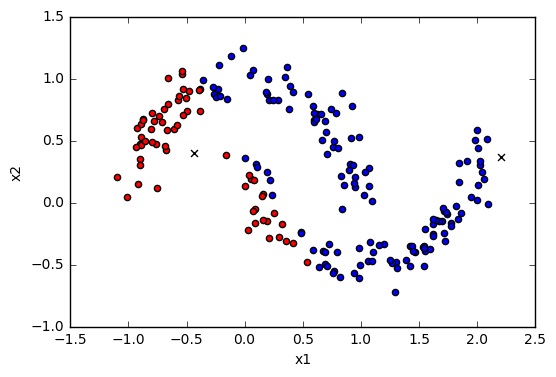

In [80]:
########### run k-means: 

def plot_k_means(data_matrix, K): 
    """ 
    """
    cluster_assignments, cluster_means = K_means_helper(K, data_matrix)
    print(cluster_means)
    plotResults(data_matrix,
                cluster_assignments, 
                cluster_means,
                K, 
                ["red", "blue", "green", "pink", "yellow"])
    
    
plot_k_means(data1_matrix, 2)
plot_k_means(data2_matrix, 2)
plot_k_means(data3_matrix, 2)
    
    

    
    

In [81]:
#### Expectation Maximization for gaussian mixture models 
## * should perform multiple restarts and accept initial values for the mean and covariance as input 

## initialize the the mean by sampling from a gaussian distribution centered on a random point in the data

## initialize the variance along each dimension to a random fraction of the total variance in the data

## 

def GMM(init_mean, init_variance): 
    """
    """
    pass

    
    